Importing necessary libraries

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [68]:
#Display Function
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

Reading the image

(-0.5, 555.5, 601.5, -0.5)

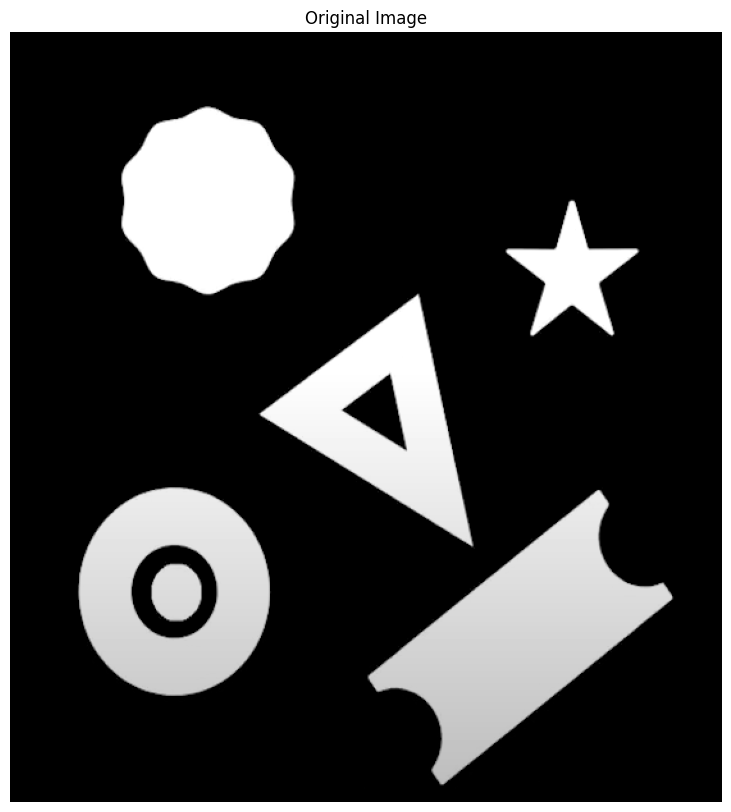

In [69]:
gray_image = cv2.imread("media/img1.png",0) #0->gray

#Display the image
plt.figure(figsize=[10,10])
plt.imshow(gray_image,cmap='gray');plt.title("Original Image");plt.axis("off")

Finding Contours
Function Syntax : contours,hierarchy = cv2.findContours(image,mode,method,contours,heirarchy,offset)
Mode : It is the contour retreival mode. 
Method : Chain Approximation Method.

In [70]:
#finding all the contours in the image
#HERE contours gives a python list
contours,hierarchy = cv2.findContours(gray_image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#Display total number of contours found
print(f"Total Contours: {len(contours)}")   

Total Contours: 164


Displaying Detected Contours

(-0.5, 555.5, 601.5, -0.5)

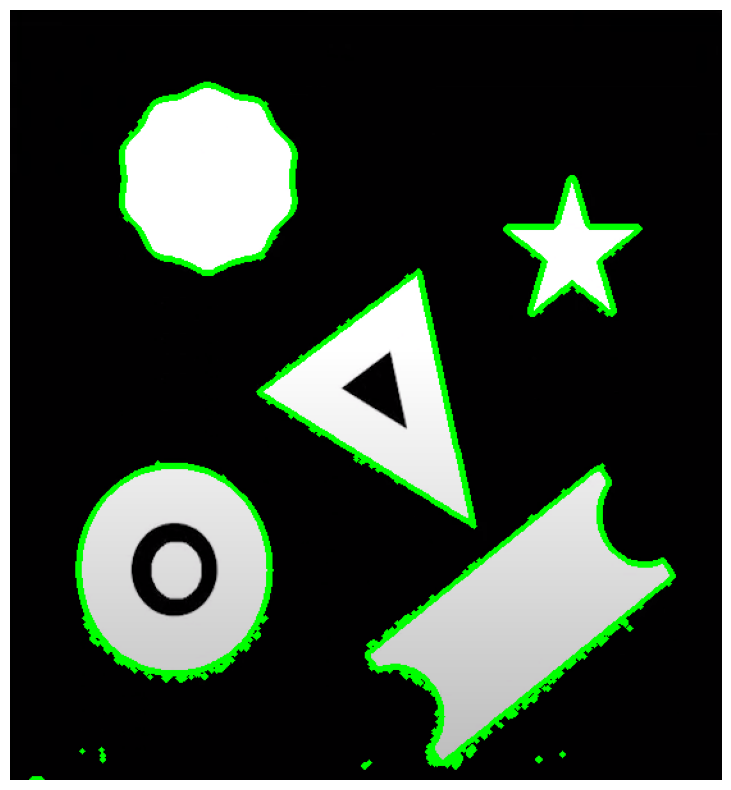

In [71]:
image_copy = cv2.imread('media/img1.png')
cv2.drawContours(image_copy,contours,-1,(0,255,0),3)
plt.figure(figsize=[10,10])
plt.imshow(image_copy[:,:,::-1]);plt.axis("off")

Preprocessing the Contours to be displayed

In [72]:
"""
Two Methods:
1. Thresholding based Preprocessing
2. Edge based preprocessing
"""

'\nTwo Methods:\n1. Thresholding based Preprocessing\n2. Edge based preprocessing\n'

Thresholding based Preprocessing

(-0.5, 488.5, 429.5, -0.5)

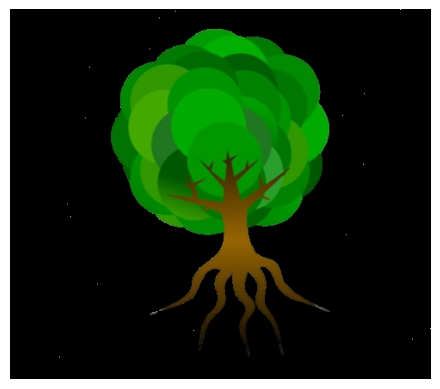

In [73]:
#Read Image
image2 = cv2.imread('media/tree_new.png')
plt.imshow(image2[:,:,::-1]);plt.axis("off")

(-0.5, 488.5, 429.5, -0.5)

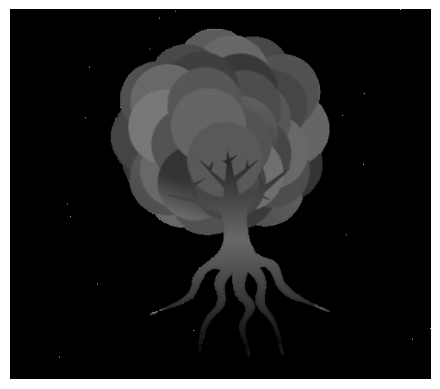

In [74]:
# Gray Scale Conversion
gray = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray');plt.axis("off")

(-0.5, 488.5, 429.5, -0.5)

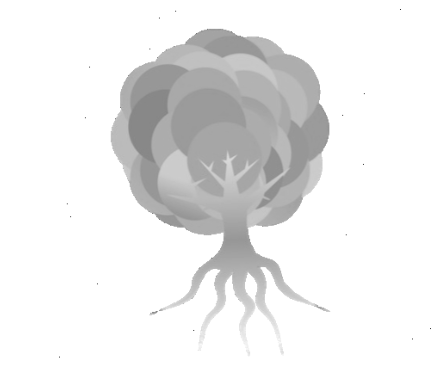

In [75]:
#Inversion
inverted = cv2.bitwise_not(gray)
plt.imshow(inverted,cmap='gray');plt.axis("off")

(-0.5, 488.5, 429.5, -0.5)

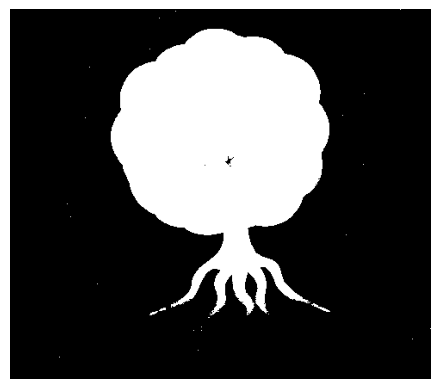

In [76]:
#Thresholding
_,thresh =  cv2.threshold(inverted, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(thresh,cmap='gray');plt.axis("off")

37


(-0.5, 488.5, 429.5, -0.5)

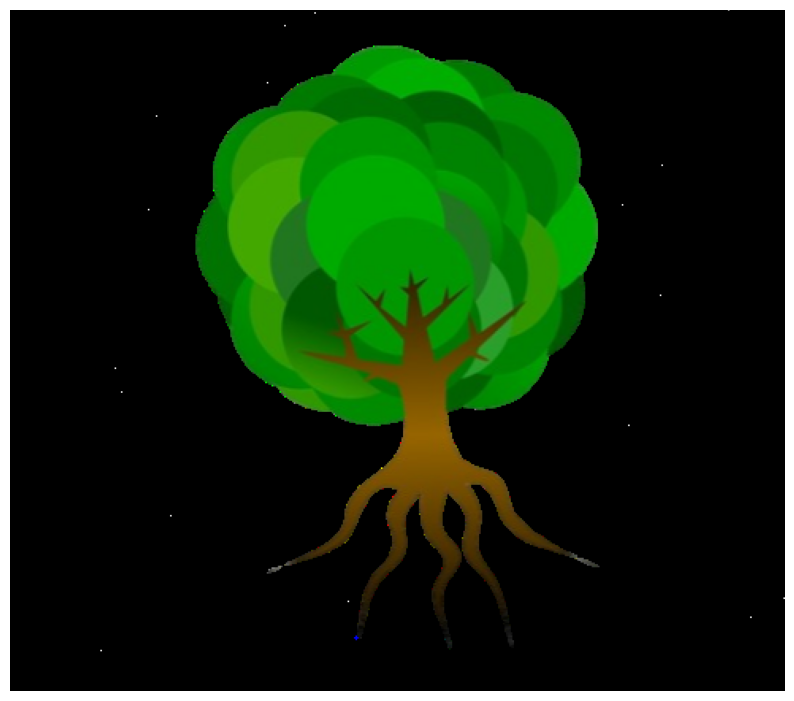

In [78]:
image2_copy= image2.copy()

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
image2_copy = cv2.drawContours(image2_copy,contours,1,(255,0,0),2)
# for c in contours:
#     x,y,w,h = cv2.boundingRect(c)
#     cv2.rectangle(image2_copy,(x,y),(x+w,y+h),(0,255,0),2)
plt.figure(figsize=[10,10])
plt.imshow(image2_copy[:,:,::-1]);plt.axis("off")